# Insper - Modelagem e Simulação do Mundo Físico

## Modelagem Paraquedista saltando da estratosfera

In [145]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

## Parâmetros iniciais

In [146]:
#pesos
massa = 90 #kg

#constante gravitacional
G = 6.67 * 1e-11 #N*m^2/kg^2
#massa da terra
M = 5.972 * 1e24 #kg

#cond. inicial
raiodaterra = 6371000 #m
y0 = 38969.4 #m
v0 = 0
listainicial = [y0, v0]

#importantes para calcular a resistência do ar
#Com Paraquedas
Cd_comParaquedas = 1.75 
Area_Paraquedas = 12.54 #m^2 (seção transversal)
AberturaP = 2566.8 #m
RaioP = 15 #m

#Sem Paraquedas
Cd_semParaquedas = 0.9
Area_Humano = 0.3 #m^2 (seção transversal)


#cria lista de tempo
Tmax = 600 #segundos
dt = 1e-2 #min
listatempo = np.arange(0, Tmax, dt)

Definindo modelo

In [147]:
def modelo(x, t):
    #desagrupa da lista
    y = x[0]
    vy = x[1]
    
    #condição para achar rho 
    if y > 0:
        rho = -2e-24*(y**5) + 7e-19*(y**4) - 8e-14*(y**3) + 4e-9*(y**2) - (0.0001*y) + 1.2267
    else:
        rho = 0
        
    #gravidade em função da altura
    g = (G * M) / (raiodaterra + y)**2
    
    #força Peso
    F_Peso = massa * g
    
    #condição da abertura do paraquedas
    
    if y >= AberturaP: 
        Area = Area_Humano
        Cd = Cd_semParaquedas
    elif y < AberturaP:
        Area = Area_Paraquedas
        Cd = Cd_comParaquedas
    elif y <= 0:
        Far = 0 
        
    
    #calcula a resistência do ar
    Far = (rho * Area * Cd * (vy ** 2)) / 2
    
    #condição para terem forças agindo no modelo
    if y > 0:
        dydt = vy
        dvydt = (Far - F_Peso)/massa
    else:
        dydt = 0
        dvydt = 0
        
        
    #agrupa em listas para retornar
    dYdt = [dydt, dvydt]
    
    return dYdt

##  Implementando Odeint e plotando Gráfico

C:\Users\julia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


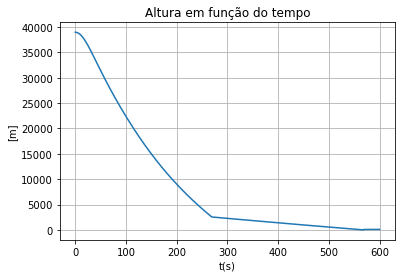

In [148]:
#chamando a função odeint
solucao = odeint(modelo, listainicial, listatempo)
trajetoria = solucao[:, 0] 


 
plt.plot(listatempo, trajetoria)
plt.grid(True)
plt.title("Altura em função do tempo")
plt.xlabel("t(s)")
plt.ylabel("[m]")
plt.show()

## Validação

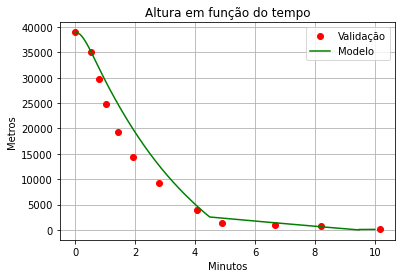

In [149]:
listax = [0,31.20356612,48.14264487,61.51560178,84.69539376,115.8989599,168.4992571,243.3878158,293.3135215,400.2971768,492.1248143,609.8068351]
listay = [y0,35050.70994,29776.87627,24746.4503,19391.48073,14442.19067,9249.492901,3975.659229,1379.310345,892.494929,730.2231237,243.4077079]

#lista para transformar lista x de segundos para minutos
listax_nova = []
for i in range(len(listax)):
    listax_nova.append(listax[i]/60)
    

plt.plot(listax_nova, listay, 'ro', label='Validação')
plt.plot(listatempo/60, trajetoria, 'g', label="Modelo")
plt.legend()
plt.title('Altura em função do tempo')
plt.ylabel('Metros')
plt.xlabel('Minutos')
plt.grid(True)
plt.show()

## Variando a massa do Felix Baumgartner

C:\Users\julia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\julia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\julia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\julia\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\U

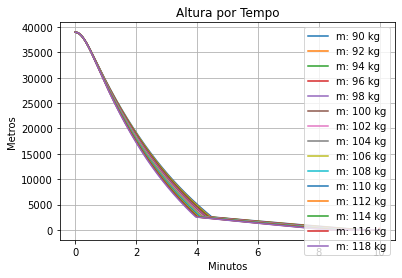

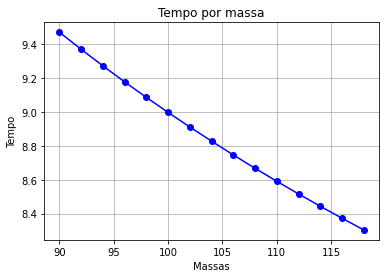

In [161]:
#função auxiliar para encontrar o momento que atinge o chão
def alcancasolo(alt,t):
    inddotempo = 0 
    for i in range(len(alt)):
        if alt[i] <= 0:
            inddotempo = i
            break
    return t[inddotempo]

#lista de variações de peso para entrar no odeint
listamassas = np.arange(90, 120, 2)

#novo modelo para variar a massa
def modelo2(x, t, massa2):
    #desagrupa da lista
    y = x[0]
    vy = x[1]
    
    #condição para achar rho 
    if y > 0:
        rho = -2e-24*(y**5) + 7e-19*(y**4) - 8e-14*(y**3) + 4e-9*(y**2) - (0.0001*y) + 1.2267
    else:
        rho = 0
        
    #gravidade em função da altura
    g = (G * M) / (raiodaterra + y)**2
    
    #força Peso
    F_Peso = massa2 * g
    
    #condição da abertura do paraquedas
    
    if y >= AberturaP: 
        Area = Area_Humano
        Cd = Cd_semParaquedas
    elif y < AberturaP:
        Area = Area_Paraquedas
        Cd = Cd_comParaquedas
    elif y <= 0:
        Far = 0 
        
    
    #calcula a resistência do ar
    Far = rho * Area * Cd * (vy ** 2)* (1/2)
    
    #condição para terem forças agindo no modelo
    if y > 0:
        dydt = vy
        dvydt = (Far - F_Peso)/massa2
    else:
        dydt = 0
        dvydt = 0
        
        
    #agrupa em listas para retornar
    dYdt = [dydt, dvydt]
    
    return dYdt

#lista para pegar o tempo que atinge o chão das massas
listatemponochao = []

#gerando a variação de massas e adicionando na hora que alcança o chão
for i in range(len(listamassas)):
    solucao2 = odeint(modelo2, listainicial, listatempo, args = (listamassas[i],))
    trajetoria2 = solucao2[:, 0]
    plt.plot(listatempo/60, trajetoria2, label='m: {} kg'.format(listamassas[i]))
    listatemponochao.append(alcancasolo(trajetoria2, listatempo/60))
    

#análise das diferentes massas   
plt.title('Altura por Tempo')
plt.xlabel('Minutos')
plt.ylabel('Metros')
plt.legend()
plt.grid(True)
plt.show()

#gráfico conclusivo da diferença de batida no chão de cada peso
plt.plot(listamassas, listatemponochao, 'b-o')
plt.title('Tempo por massa')
plt.xlabel('Massas')
plt.ylabel('Tempo')
plt.grid(True)
plt.show()



